# Notebook for Group 1 - Disease prediction

Three models will be tested:
kNN
Decision tree
Logistic regression


This first section will include data reading and initial cleaning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
import scipy.special as special
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors
#https://www.kaggle.com/code/chandrug/symptoms-based-disease-prediction-accuracy-99
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"

dataDS = pd.read_csv(filename,skipinitialspace = True)
dataWeight = pd.read_csv(filename4, skipinitialspace = True)


dataDS.replace(' ', '',regex=True,inplace=True)

In [2]:
pip install sklearn-evaluation #Needed to be installed as an extra for some reason

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Needed'


### The following code will create 6 datasets: 
A regular dataset that will simply be the original 
A weighted dataset where each symptom will be matched with it corresponding weight from the "Symptom-severity.csv" dataset.
A regular dataset but only with Hepatitis diseases
A weighted dataset with the Hepatitis diseases
One of Hepatitis data and one of Regular, where each symptom has a unique code

Each dataset has already been created and can be found in the zip file, to minimize run time

In [3]:
from sklearn.preprocessing import LabelEncoder

Symp = dataWeight['Symptom']
Weight = dataWeight['weight']

################Regular original data

#dataDS.to_csv("RegularData.csv")

################Weighted original data

#newData = dataDS

#for i in range(len(newData)):
#    for n in range (len(newData.columns)):
#        for S in range (len(Symp)):
#            if newData.iat[i,n] == Symp[S]:
#                newData.iat[i,n] = Weight[S]
                
#newData.to_csv("RegularDataWeighted.csv")  


################Unique Regular Data
                
#X = dataDS.drop('Disease', axis = 1)
#for i in X.columns:
#    X[i] = LabelEncoder().fit_transform(X[i].astype(str))
    
#RegularDataUnique = pd.concat( [dataDS['Disease'], X], axis=1)
#RegularDataUnique.to_csv("RegularDataUnique.csv") 
    
################Regular Hepatitis data

#HepData = dataDS[(dataDS['Disease']=='HepatitisC')|
#                  (dataDS['Disease']=='HepatitisE')|
#                  (dataDS['Disease']=='HepatitisD')|
#                  (dataDS['Disease']=='HepatitisB')|
#                  (dataDS['Disease']=='hepatitisA')]

#HepData.to_csv("HepData.csv")


################Unique Hepatitis Data

#X = HepData.drop('Disease', axis = 1)
#for i in X.columns:
#    X[i] = LabelEncoder().fit_transform(X[i].astype(str))
    
#HepDataUnique = pd.concat([HepData['Disease'], X], axis=1)
#HepDataUnique.to_csv("HepDataUnique.csv") 

################Weighted Hepatitis data

#for i in range(len(HepData)): #KØR DEN HER KODE HVIS DU GERNE VIL HAVE VÆGTE I STEDET FOR NAVNE
#    for n in range (len(HepData.columns)):
#        for S in range (len(Symp)):
#            if HepData.iat[i,n] == Symp[S]:
#                HepData.iat[i,n] = Weight[S]
                
#HepData.to_csv("HepDataWeighted.csv")



In [4]:
#Read all csv files and assign variable

RD = pd.read_csv("RegularData.csv")
RDW = pd.read_csv("RegularDataWeighted.csv")
RDU = pd.read_csv("RegularDataUnique.csv")
HD = pd.read_csv("HepData.csv")
HDW = pd.read_csv("HepDataWeighted.csv")
HDU = pd.read_csv("HepDataUnique.csv")

#For some unknown reason, each dataset gets an extra index row when reading in from CSV. This is removed here

RD = RD.drop('Unnamed: 0', axis = 1)
RDW = RDW.drop('Unnamed: 0', axis = 1)
RDU = RDU.drop('Unnamed: 0', axis = 1)
HD = HD.drop('Unnamed: 0', axis = 1)
HDW = HDW.drop('Unnamed: 0', axis = 1)
HDU = HDU.drop('Unnamed: 0', axis = 1)

Now the data is cleaned and models can be used. Some extra data cleaning may occur at individual models

## kNN

First the data will be split and fitted to the model. Later on, a model will be fitted to the Hepatitis data instead, too see if using only a few diseases, will make it less complex.

Trying with the weighted data first and then the unique data, to see how the accuracy differs.

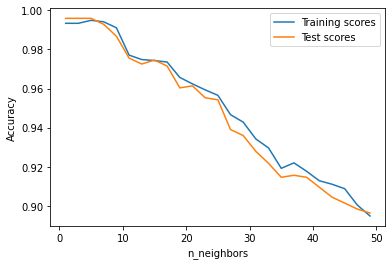

In [5]:
#XWeighted= RDW.drop('Disease', axis=1)
#yWeighted = RDW['Disease']

#X_train, X_test, y_train, y_test = train_test_split(XWeighted, yWeighted, test_size=0.33, random_state=80)

#df = pd.read_csv("HepDataWithNAN.csv",skipinitialspace = True)
df = pd.read_csv("dataset.csv",skipinitialspace = True)
#df = df.drop('Unnamed: 0', axis=1)
df = shuffle(df, random_state = 42)
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
cols = df.columns
data1 = df[cols].values.flatten()
reshaped = pd.Series(data1)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)
df = pd.DataFrame(reshaped, columns = df.columns)
df = df.fillna(0)
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)
df_severity['Symptom'].unique()
vals = df.values
symptoms = df_severity['Symptom'].unique()
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]
df_pros = pd.DataFrame(vals, columns=cols)
df_pros = df_pros.replace('dischromic  patches', 0)
df_pros = df_pros.replace('spotting  urination', 0)
df_pros = df_pros.replace('foul smell of urine', 0)

X = df_pros.iloc[:,1:].values
y = df['Disease'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



training_scores = []
test_scores = []

neighbors = range(1, 50, 2)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


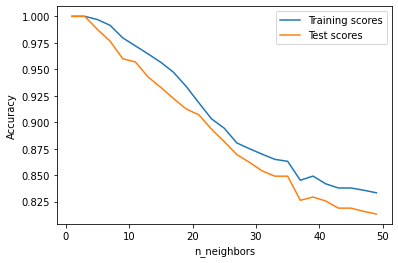

In [6]:
XUnqiue = RDU.drop('Disease', axis=1)
yUnqiue = RDU['Disease']

X_train, X_test, y_train, y_test = train_test_split(XUnqiue, yUnqiue, test_size=0.33, random_state=80)

training_scores = []
test_scores = []

neighbors = range(1, 50, 2)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


No real difference can be seen using the two different methods. Therefore the weighted data will simply be used from here on.

From here, the best possible kNN model will be made. This will be done through a Grid Search, to get the best possible parameters. The model will be set up as a pipeline, so we kan easily fit the hepatitis data later too. 

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn_evaluation import plot


#XWeighted= RDW.drop('Disease', axis=1)
#yWeighted = RDW['Disease']

#X_train, X_test, y_train, y_test = train_test_split(XWeighted, yWeighted, test_size=0.33, random_state=80)

knn = KNeighborsClassifier()

n_range = range(1, 25)
param_grid = dict(n_neighbors=n_range)

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))



ModuleNotFoundError: No module named 'sklearn_evaluation'

And for the Hepatitis data

In [ ]:
XWeighted= HDW.drop('Disease', axis=1)
yWeighted = HDW['Disease']

X_train, X_test, y_train, y_test = train_test_split(XWeighted, yWeighted, test_size=0.33, random_state=3)

knn = KNeighborsClassifier()

n_range = range(1, 25)
param_grid = dict(n_neighbors=n_range)

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))


Now to evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred_test)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Diseases 1-41']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for kNN classifier')
plt.show()

## Conclusions from kNN 

For work on the remaining two models, we will only be looking at

## WHAT?

## Random Decision Trees

## Logistic regression

## All scores